In [7]:
import nltk
import spacy 
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Exercese 1: Enhanced Text Preprocessing

In [8]:
# Create a small dataset of movie reviews with labels 1 for positive and 0 for negative
movie_reviews = [
    ("I loved the movie! It was fantastic!", 1),
    ("The movie was terrible! I hated it!", 0),
    ("What a great film! I really enjoyed it!", 1),
    ("It was a boring movie. I didn't like it at all.", 0),
    ("The plot was weak and the characters were flat.", 0)
]

1. Compare NLTK vs spaCy preprocessing

In [9]:
# import nltk resources
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [10]:
# nltk function
def nltk_preprocess(text):
    # Download NLTK resources
    nltk.download('punkt')
    nltk.download('stopwords')

    # Tokenize and remove stop words
    stop_words = set(stopwords.words('english'))

    # Process the reviews
    processed_reviews = []
    
    # Tokenize and filter out stop words
    for review, label in text:
        tokens = nltk.word_tokenize(review.lower()) # Convert to lowercase
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words] # Remove punctuation and stop words
        processed_reviews.append((' '.join(filtered_tokens), label)) # Join tokens back into a string

    # Return the processed reviews
    return tokens, filtered_tokens, processed_reviews

In [11]:
# spaCy function
def spacy_preprocess(text):
    # Load spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Process the reviews
    processed_reviews = []

    # Tokenize and filter out stop words
    for review, label in text:
        doc = nlp(review.lower())  # Convert to lowercase
        filtered_tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]  # Remove stop words and punctuation
        processed_reviews.append((' '.join(filtered_tokens), label))  # Join tokens back into a string

    return doc, filtered_tokens, processed_reviews

### Analyze preprocessing steps

In [ ]:
low_tokens1, stop_rem1, processed1 = nltk_preprocess(movie_reviews) # Call NLTK preprocessing function and store results
low_tokens2, stop_rem2, processed2 = spacy_preprocess(movie_reviews) # Call spaCy preprocessing function and store results

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikolai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikolai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Quick verification and comparison of results
print("NLTK Lowercased Tokens:", low_tokens1)
print("spaCy Lowercased:", low_tokens2)
print("NLTK Filtered Tokens:", stop_rem1)
print("spaCy Filtered Tokens:", stop_rem2)
print("NLTK Processed Reviews:", processed1)
print("spaCy Processed Reviews:", processed2)

NLTK Lowercased Tokens: ['the', 'plot', 'was', 'weak', 'and', 'the', 'characters', 'were', 'flat', '.']
spaCy Lowercased Tokens: the plot was weak and the characters were flat.
NLTK Filtered Tokens: ['plot', 'weak', 'characters', 'flat']
spaCy Filtered Tokens: ['plot', 'weak', 'characters', 'flat']
NLTK Processed Reviews: [('loved movie fantastic', 1), ('movie terrible hated', 0), ('great film really enjoyed', 1), ('boring movie like', 0), ('plot weak characters flat', 0)]
spaCy Processed Reviews: [('loved movie fantastic', 1), ('movie terrible hated', 0), ('great film enjoyed', 1), ('boring movie like', 0), ('plot weak characters flat', 0)]


2. Analyze preprocessing steps

In [ ]:
# imprt matplotlib for visualization
import matplotlib.pyplot as plt

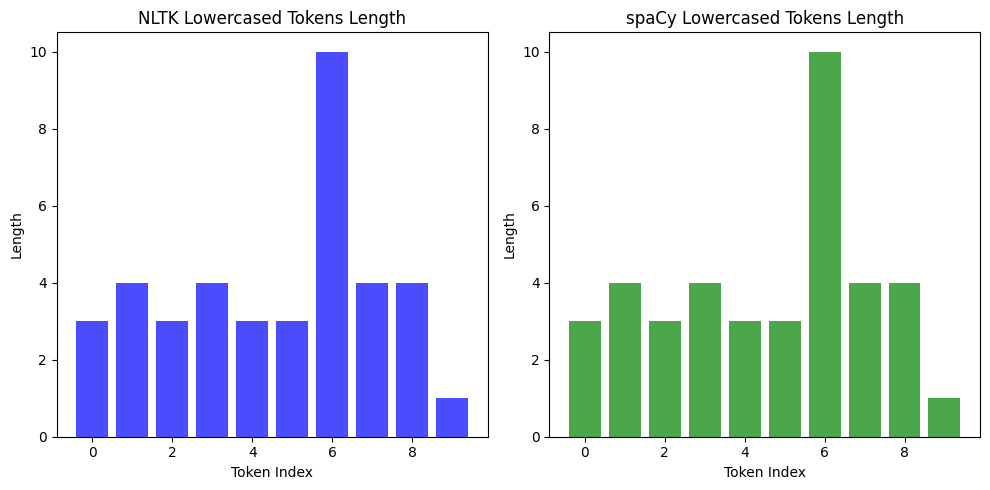

In [ ]:
# Visualize the length of lowercased tokens
# NLTK
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(low_tokens1)), [len(token) for token in low_tokens1], color="blue", alpha=0.7, label="NLTK Tokens")
plt.title("NLTK Lowercased Tokens Length")
plt.xlabel("Token Index")
plt.ylabel("Length")

# spaCy    
plt.subplot(1, 2, 2)
plt.bar(range(len(low_tokens2)), [len(token) for token in low_tokens2], color="green", alpha=0.7, label="spaCy Tokens")
plt.title("spaCy Lowercased Tokens Length")
plt.xlabel("Token Index")
plt.ylabel("Length")
plt.tight_layout()
plt.show()

As the graphs show there were no major changes when lowercasing the text. Though virtually identical, there is one differences. NTLK was tokenized when lowercaing, while spaCy lowercased on a seperate step from tokenizing.

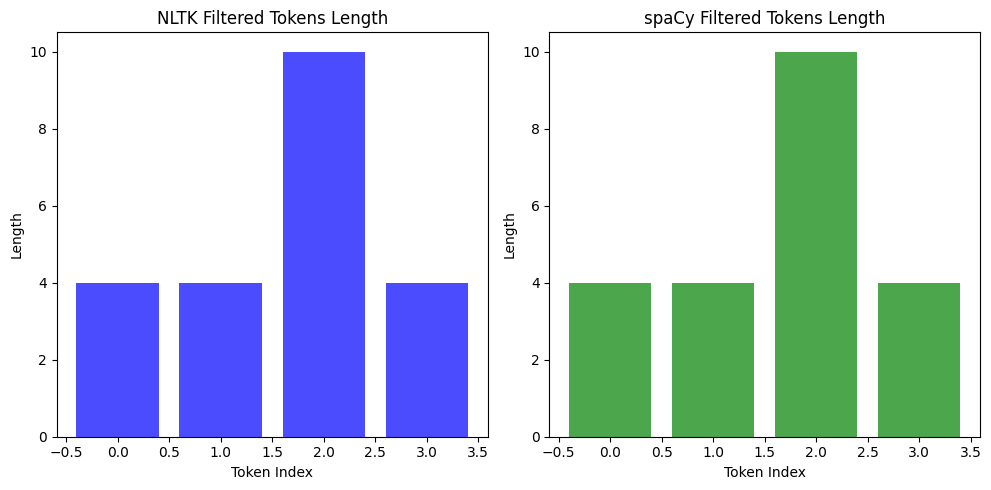

In [ ]:
# Visualize the filtered tokens (stop word removal)
# NLTK
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(stop_rem1)), [len(token) for token in stop_rem1], color="blue", alpha=0.7, label="NLTK Filtered Tokens")
plt.title("NLTK Filtered Tokens Length")
plt.xlabel("Token Index")
plt.ylabel("Length")

# Analyze preprocessing steps
plt.subplot(1, 2, 2)
plt.bar(range(len(stop_rem2)), [len(token) for token in stop_rem2], color="green", alpha=0.7, label="spaCy Filtered Tokens")
plt.title("spaCy Filtered Tokens Length")
plt.xlabel("Token Index")
plt.ylabel("Length")
plt.tight_layout()
plt.show()

Again, after filtering for stop words, the charts show the token counts to be nearly identical. spaCy removed one more word than NTLK.

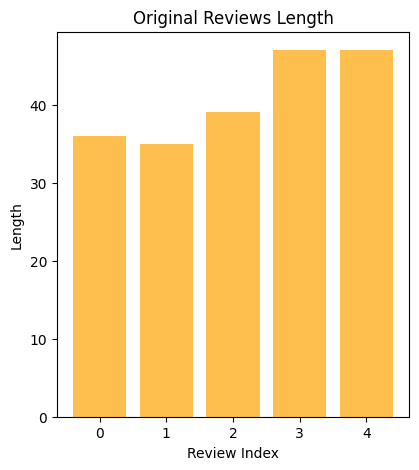

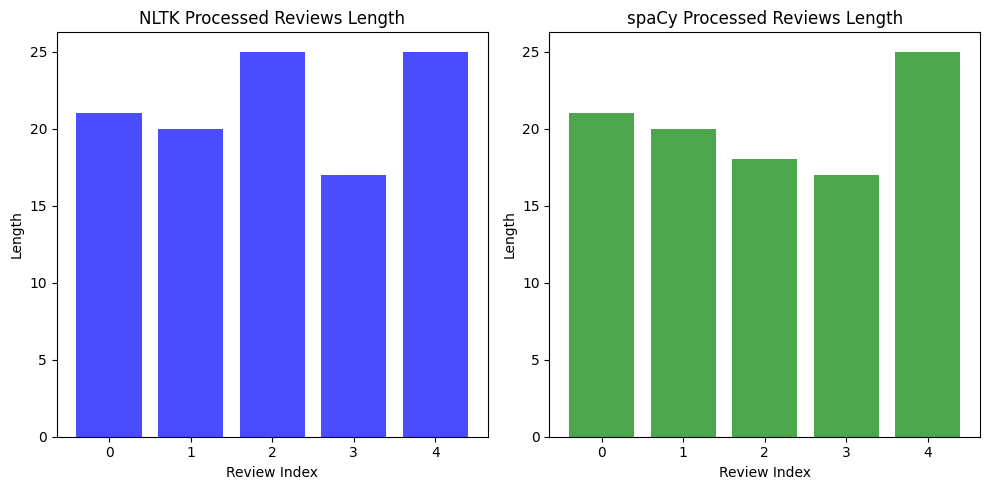

In [ ]:
# Visulaize the processed reviews vs original reviews
# Original reviews
original_reviews = [review[0] for review in movie_reviews]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(original_reviews)), [len(review) for review in original_reviews], color="orange", alpha=0.7, label="Original Reviews")
plt.title("Original Reviews Length")
plt.xlabel("Review Index")
plt.ylabel("Length")

# NLTK
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(processed1)), [len(review[0]) for review in processed1], color="blue", alpha=0.7, label="NLTK Processed Reviews")
plt.title("NLTK Processed Reviews Length")
plt.xlabel("Review Index")
plt.ylabel("Length")

# spaCy
plt.subplot(1, 2, 2)
plt.bar(range(len(processed2)), [len(review[0]) for review in processed2], color="green", alpha=0.7, label="spaCy Processed Reviews")
plt.title("spaCy Processed Reviews Length")
plt.xlabel("Review Index")
plt.ylabel("Length")
plt.tight_layout()
plt.show()

You can see that both character counts for each processed review is similar between the two techniques, when compared to the original. The one distinction is on the 3rd reviewm index 2. The decrease of 6 characters between NTLK and spaCy id due to spaCy removing the adverb "Really". 

3. Document and Analyze differences between NLTK and spaCy results

- NLTK: Uses word_tokenize, which can split contractions ("didn't" → ["did", "n't"]) and retains more granular punctuation tokens.

- spaCy: Produces more linguistically-aware tokens (e.g., handles "didn't" as one token), and includes part-of-speech tagging, dependency parsing, etc.

- NLTK: Uses a basic list from stopwords.words('english'). These are generic and might miss contextual stopwords.

- spaCy: Uses token.is_stop, a more refined stopword list that considers context, language models, and usage patterns.

#### Removed Tokens

Original Text:
"It was a boring movie. I didn't like it at all."

NLTK:
["boring", "movie", "like"]

spaCy:
["boring", "movie", "like"]

Both removed the same tokens (words) and filtered out the same punctuations.
Filtered out [it, was, a, i, didn't, it, at, all]

Original text:
"What a great film! I really enjoyed it!."

NLTK:
[great, film, really, enjoyed]

spaCy:
[great, film, enjoyed]

NLTK kept really while spaCy filtered it out. The word "really" was used to enhance "enjoyed" and is not really necessary beyond that.
Filtered out [what, a, i, it] in NLTK and [what, a, i, really, it] in spaCy

Based soley on the results I recieved, there is not enough information to make claims on which would be better for what type of project.

However, the removal of an adverb like really points to a more extensive tokenization process with spaCy. Though really can be used for purposes other than intesifying verbs, adjectives, etc. that could be important to context. So further study would need to be done to verify if spaCy removes it in those cases or not.
With this in mind, we could assume spaCy would be better for bigger projects requiring more in depth processing. While NLTK would be suited for smaller projects and stemming purposes.

# Exercise 2. Basic Feature Extraction

Compare CountVectorizer and TfidVectorizer

In [22]:
# Initialize both vectors
count_vec = CountVectorizer()
tfidf_vec = TfidfVectorizer()

reviews = [review for review, label in processed1]  # Use NLTK processed reviews for vectorization

# Fit and transform the reviews using CountVectorizer and TfidfVectorizer
count_matrix = count_vec.fit_transform(reviews) 
tfidf_matrix = tfidf_vec.fit_transform(reviews)

# Get feature names
count_features = count_vec.get_feature_names_out()
tfidf_features = tfidf_vec.get_feature_names_out()

In [24]:
print("CountVectorizer Features:", count_features)
print("\nTfidfVectorizer Features:", tfidf_features)

CountVectorizer Features: ['boring' 'characters' 'enjoyed' 'fantastic' 'film' 'flat' 'great' 'hated'
 'like' 'loved' 'movie' 'plot' 'really' 'terrible' 'weak']

TfidfVectorizer Features: ['boring' 'characters' 'enjoyed' 'fantastic' 'film' 'flat' 'great' 'hated'
 'like' 'loved' 'movie' 'plot' 'really' 'terrible' 'weak']


In [25]:
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_features)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)

In [26]:
print("CountVectorizer Matrix:", count_df)
print("\nTfidfVectorizer Matrix:", tfidf_df)

CountVectorizer Matrix:    boring  characters  enjoyed  fantastic  ...  plot  really  terrible  weak
0       0           0        0          1  ...     0       0         0     0
1       0           0        0          0  ...     0       0         1     0
2       0           0        1          0  ...     0       1         0     0
3       1           0        0          0  ...     0       0         0     0
4       0           1        0          0  ...     1       0         0     1

[5 rows x 15 columns]

TfidfVectorizer Matrix:     boring  characters  enjoyed  fantastic  ...  plot  really  terrible  weak
0  0.00000         0.0      0.0    0.63907  ...   0.0     0.0   0.00000   0.0
1  0.00000         0.0      0.0    0.00000  ...   0.0     0.0   0.63907   0.0
2  0.00000         0.0      0.5    0.00000  ...   0.0     0.5   0.00000   0.0
3  0.63907         0.0      0.0    0.00000  ...   0.0     0.0   0.00000   0.0
4  0.00000         0.5      0.0    0.00000  ...   0.5     0.0   0.00000   0.

- Count vectorizer outputs the frequency each word appears. The words have whole number weights, mostly 0 to 1, with the highest frequencies weighted heaviest.

- Tfidf Vectorizer outputs the importance of each word. Each word is weighted in decimal form between 0 and 1. The more frequent a word, the less importance it is given. Resultuing in a lower value.

# Exercise 3: Text Classification

In [32]:
reviews = [review for review, label in processed1]  # Use NLTK processed reviews for classification
labels = [label for review, label in processed1]  # Extract labels

In [33]:
tfidf_vec = TfidfVectorizer()  # Initialize TfidfVectorizer
X = tfidf_vec.fit_transform(reviews)  # Use TfidfVectorizer for classification
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [35]:
# Implement both classifiers
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression()
}

In [36]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))  # Print classification report


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [39]:
from sklearn.metrics import accuracy_score
# Function to evaluate the pipeline performance
def evaluate_pipeline(preproc_reviews, labels, description = ""):
    # Use TfidfVectorizer to transform the reviews and classification
    tfidf = TfidfVectorizer()
    X = tfidf.fit_transform(preproc_reviews)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
    
    # Define the models to evaluate
    models = {
        'Naive Bayes': MultinomialNB(),
        'Logistic Regression': LogisticRegression()
    }

    # Evaluate each model    
    print(f"\nEvaluation: {description}")
    
    for name, model in models.items():
        model.fit(X_train, y_train) # Train the model
        y_pred = model.predict(X_test) # Make predictions
        acc = accuracy_score(y_test, y_pred) # Calculate accuracy
        print(f"\n{name} Accuracy: {acc:.2f}") # Print accuracy
        print(classification_report(y_test, y_pred, zero_division=0)) # Print classification report

In [41]:
# Prepare the data for evaluation
# Original reviews
og_reviews = [review for review, label in movie_reviews]
og_labels = [label for review, label in movie_reviews]

# NLTK
nltk_reviews = [review for review, label in processed1]
nltk_labels = [label for review, label in processed1]

# spaCy
spacy_reviews = [review for review, label in processed2]
spacy_labels = [label for review, label in processed2]

In [42]:
# Evaluate
evaluate_pipeline(og_reviews, og_labels, "Original Reviews")
evaluate_pipeline(nltk_reviews, nltk_labels, "NLTK Preprocessed Reviews")
evaluate_pipeline(spacy_reviews, spacy_labels, "spaCy Preprocessed Reviews")


Evaluation: Original Reviews

Naive Bayes Accuracy: 0.00
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Logistic Regression Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Evaluation: NLTK Preprocessed Reviews

Naive Bayes Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.

The results show the original text as unstable with a naive bays accuracy of 0 and logistic regression accuracy of 1.
Both NLTK and scored 1 in logistic regression accuracy. However, only NLTK averaged a 1 in naive bays, with spaCy averaging 0. 
This may be due to spaCy removing too may words. Though there was only a difference of one word between the two prcessed results.
This indicates more study needs to be done.

In [45]:
from sklearn.feature_selection import SelectKBest, chi2

In [46]:
# Feature selection analysis
def feature_selection_analysis(reviews, labels, k):
    # Use TfidfVectorizer to transform the reviews and select top k features
    tfidf = TfidfVectorizer()
    X = tfidf.fit_transform(reviews) # Transform the reviews into TF-IDF features
    selector = SelectKBest(score_func=chi2, k=k) # Select top k features based on chi-squared test
    X_new = selector.fit_transform(X, labels) # Fit the selector to the data and transform it
    
    selected_indices = selector.get_support(indices=True) # Get the indices of the selected features
    selected_features = [tfidf.get_feature_names_out()[i] for i in selected_indices] # Get the names of the selected features
    
    # Return the transformed data and the selected features
    return X_new, selected_features

In [47]:
for k in [5, 10, 15]:
    X_new, features = feature_selection_analysis(nltk_reviews, nltk_labels, k)
    print(f"\nTop {k} Selected Features:\n", features)


Top 5 Selected Features:
 ['fantastic', 'film', 'great', 'loved', 'really']

Top 10 Selected Features:
 ['boring', 'enjoyed', 'fantastic', 'film', 'great', 'hated', 'like', 'loved', 'really', 'terrible']

Top 15 Selected Features:
 ['boring', 'characters', 'enjoyed', 'fantastic', 'film', 'flat', 'great', 'hated', 'like', 'loved', 'movie', 'plot', 'really', 'terrible', 'weak']
